<a href="https://colab.research.google.com/github/Neoneto/CodingDojo_Week3/blob/main/Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Parts 1 and 2 (Core)
Submitted by Kenneth Alaba



## Imports the necessary dataset as pandas dataframe


In [199]:
# Import the pandas library
import pandas as pd

In [200]:
# Load the data

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Opening the file
filename = '/content/drive/My Drive/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'
df_sales = pd.read_csv(filename)

# Shows the head of the dataframe
df_sales.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Displays the information of the dataframe

In [201]:
# Shows the info of the dataframe
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


From here, we can see the data type that each column contains. We can also see that two of the columns contain missing values.

## Displays the duplicated rows

In [202]:
# Shows the duplicated rows of the dataframe
df_sales[df_sales.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


This tells us that the dataframe contains no duplicated rows.

## Missing values

In [203]:
# Shows how many missing values are in each columns
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

This tells us that only the columns 'Item_Weight' and 'Outlet_Size' has missing values which we will try to fill in the later parts.

## Dealing with missing values
Since all the missing values are only in the columns of the Item_Weight  and Outlet_Size , we can easily fill those missing values by looking at other rows with the same Item_Identifier for the weight and same Outlet_Identifier for the outlet size and just copying their values. We can do this since both the Item_Identifier and the Outlet_Identifier are unique.

### Filling missing values in Item_Weight

To fill the missing weights, we create a dictionary of the product identifier, which is unique, and its corresponding weight, using entries from other rows. We then map this dictionary to fill the missing values depending on the item identifier of the missing weight.

In [204]:
# Gets the set (unique values) of the product identifiers and its weight
dict_weight = df_sales[['Item_Identifier','Item_Weight']].dropna()
dict_weight = dict_weight.drop_duplicates()

# Creates a dictionary from the set
dict_weight = dict_weight.set_index('Item_Identifier')['Item_Weight'].to_dict()


In [205]:
# Fills the missing values in Item_Weight using the dictionary
df_sales.Item_Weight = df_sales.Item_Weight.fillna(df_sales.Item_Identifier.map(dict_weight))

# Checks whether there are still missing values
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We can see that there are still missing values in the Item_Weight column.

In [206]:
# Obtain the rows with still missing weights
missing_weight = df_sales[df_sales[['Item_Identifier','Item_Weight']].isnull().any(axis=1)]
missing_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [207]:
# Checks whether those Item_Identifier really doesn't appear in the dataframe
# with its corresponding weight.
for identifier in missing_weight['Item_Identifier']:
  print(identifier in df_sales[['Item_Identifier','Item_Weight']].dropna().drop_duplicates())

False
False
False
False


Since we can't use other entries to readily fill them, we will deal with them later.

### Filling missing values in Outlet_Size

Similar with the above method, we create a dictionary of Outlet_Identifier and its corresponding Outlet_Size and use that dictionary to fill the missing values.

In [208]:
# Create the dictionary from unique values in the Outlet_Identifier and Outlet_Size columns
dict_size = df_sales[['Outlet_Identifier','Outlet_Size']].dropna()
dict_size = dict_size.drop_duplicates()
dict_size = dict_size.set_index('Outlet_Identifier')['Outlet_Size'].to_dict()

In [209]:
# Fills the missing values depending on the Outlet_Identifier using the dictionary
df_sales.Outlet_Size = df_sales.Outlet_Size.fillna(df_sales.Outlet_Identifier.map(dict_size))

# Checks whether there are still missing values
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We can see that there are still missing values, in fact, the dictionary wasn't able to fill any missing values in the Outlet_Size column because those Outlet_Identifier never appeared in the dataframe with its corresponding size as shown using the code below.

In [210]:
# Isolates the columns with missing Outlet_Size
missing_size = df_sales[df_sales[['Outlet_Identifier','Outlet_Size']].isnull().any(axis=1)]
missing_size = missing_size[['Outlet_Identifier','Outlet_Size']].drop_duplicates()

In [211]:
# Checks if the Outlet_Identifier appeared in the dataframe with its Outlet_Size
for identifier in missing_size['Outlet_Identifier']:
  print(identifier in df_sales[['Outlet_Identifier','Outlet_Size']].dropna().drop_duplicates())

False
False
False


### Filling further missing values

Since we don't know what we wan't to extract from the dataframe yet, I think that the best way to deal with those remaining missing values is to leave them as is for now until later where we know what we want to do and can determine the most appropriate method to fill them. However, for the sake of this excercise, since the Item_Weight is numerical, the best way to fill them is by using the mean of the column(while ignoring the missing values). As for the Outlet_Size, since it is categorical, the best way is to fill it with the most frequent value in the column.

In [212]:
# Obtain the most frequent value in the Outlet_Size column
frequent_size = df_sales.Outlet_Size.mode()[0]

In [213]:
# Fill the missing values in the Outlet_Size using that most frequent value
df_sales.Outlet_Size = df_sales.Outlet_Size.fillna(frequent_size)

In [214]:
# Calculate the mean weight of the items
mean_weight = df_sales['Item_Weight'].mean(skipna=True) # Ignores missing values

# Fills missing values using the mean weight
df_sales.Item_Weight = df_sales.Item_Weight.fillna(mean_weight)

In [215]:
# Checks that there are no more missing values
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Fixing inconsistent categories

By manual inspection, we can see that the columns that can possibly suffer from inconsistency are the categorical ones which are listed in the list below.

In [216]:
# Creates a list of the columns with possible inconsistency
categorical = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [217]:
# Shows the unique values in each column of interest
for column in categorical:
  print(df_sales[column].drop_duplicates())

0     Low Fat
1     Regular
27    low fat
45         LF
81        reg
Name: Item_Fat_Content, dtype: object
0                      Dairy
1                Soft Drinks
2                       Meat
3      Fruits and Vegetables
4                  Household
5               Baking Goods
6                Snack Foods
8               Frozen Foods
15                 Breakfast
16        Health and Hygiene
18               Hard Drinks
29                    Canned
33                    Breads
72             Starchy Foods
139                   Others
231                  Seafood
Name: Item_Type, dtype: object
0     Medium
4       High
11     Small
Name: Outlet_Size, dtype: object
0    Tier 1
1    Tier 3
8    Tier 2
Name: Outlet_Location_Type, dtype: object
0    Supermarket Type1
1    Supermarket Type2
3        Grocery Store
7    Supermarket Type3
Name: Outlet_Type, dtype: object


By manual inspection, we can see that only the column Item_Fat_Content has inconsistencies where some Low Fat values are keyed in as either LF or low fat and Regular as reg. 

In [218]:
# Replaces inconsistencies in Item_Fat_Content column with their proper value
df_sales = df_sales.replace({'Item_Fat_Content': {'LF': 'Low Fat',
                                         'low fat': 'Low Fat',
                                         'reg': 'Regular'}})


In [219]:
# Checks that there are no more inconsistencies
for column in categorical:
  print(df_sales[column].drop_duplicates())

0    Low Fat
1    Regular
Name: Item_Fat_Content, dtype: object
0                      Dairy
1                Soft Drinks
2                       Meat
3      Fruits and Vegetables
4                  Household
5               Baking Goods
6                Snack Foods
8               Frozen Foods
15                 Breakfast
16        Health and Hygiene
18               Hard Drinks
29                    Canned
33                    Breads
72             Starchy Foods
139                   Others
231                  Seafood
Name: Item_Type, dtype: object
0     Medium
4       High
11     Small
Name: Outlet_Size, dtype: object
0    Tier 1
1    Tier 3
8    Tier 2
Name: Outlet_Location_Type, dtype: object
0    Supermarket Type1
1    Supermarket Type2
3        Grocery Store
7    Supermarket Type3
Name: Outlet_Type, dtype: object


## Summarize numerical columns

We isolate the numerical columns by observing what each column means and the data type of each. Just because the data type is integer or float etc. does not necessarily mean that the column is numerical.(i.e. some product ID can be int but are still nominal variables)

In [220]:
# Isolate the numerical columns
num_df = df_sales.select_dtypes(include=['float64', 'int64' ])

# Display the head()
num_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [221]:
# Calculates the mean of each column
num_df.mean()

Item_Weight                    12.875420
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [222]:
# Find the minimum value for each column
num_df.min()

Item_Weight                     4.555
Item_Visibility                 0.000
Item_MRP                       31.290
Outlet_Establishment_Year    1985.000
Item_Outlet_Sales              33.290
dtype: float64

In [223]:
# Find the maximum value for each column
num_df.max()

Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

# Project 1 - Part 3 (Core)

Now that we have cleaned the data, we can proceed with analyzing it.



In [224]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [225]:
# Imports the necessary libraries matplotlib, numpy, and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Item_Outlet_Sales of Low Fat and Regular Products
Using Histogram

In [226]:
# Isolate the Item_Outlet_Sales of Low Fat products 
low_fat = df_sales.loc[df_sales['Item_Fat_Content'] == 'Low Fat']
low_fat_sales = low_fat['Item_Outlet_Sales']

In [227]:
# Isolate the Item_Outlet_Sales of Regular (fat) products 
regular = df_sales.loc[df_sales['Item_Fat_Content'] == 'Regular']
regular_sales = regular['Item_Outlet_Sales']

Text(0.5, 1.0, 'Item Sales of Different fat Contents')

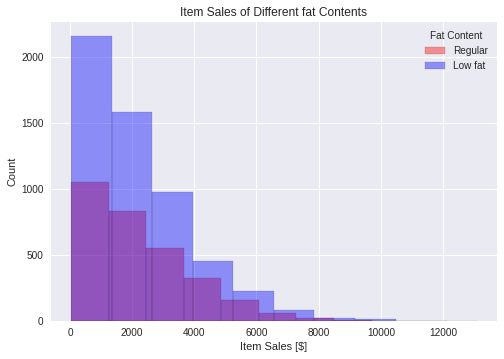

In [228]:
# Uses the seaborn style for the plot
plt.style.use('seaborn')

# Creates the two histograms of the low fat and regular
# In the same figure
plt.hist(regular_sales, alpha = 0.4, bins = 10, edgecolor = 'black', 
         color = 'red', label = 'Regular')
plt.hist(low_fat_sales, alpha = 0.4, bins = 10, edgecolor = 'black', 
         color = 'blue', label = 'Low fat')

# Grooms the plot
plt.legend(title = 'Fat Content' )
plt.xlabel('Item Sales [$]')
plt.ylabel('Count')
plt.title('Item Sales of Different fat Contents')

We can see for the plot that for both Low Fat and Regular products, the distribution of their Item_Outlet_Sales regardless of the other parameters(i.e. Outlet size, tier, and location), almost follow a half normal distribution with the most frequent group being the lowest bin of around 1000 USD and the highest item sales being the least frequent. From this graph, it may seem that Low Fat products have higher sales, signified by their higher counts across all bins, compared to regular fat content products.

## Item_Outlet_Sales of Low Fat and Regular Products
Using Box Plot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


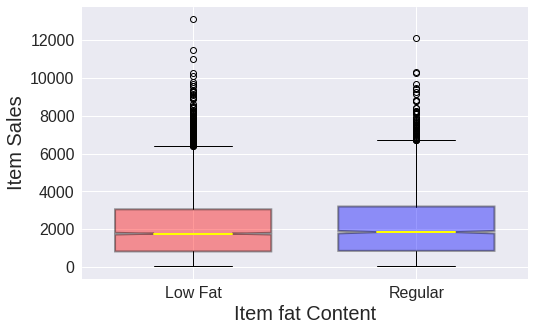

In [236]:
# Initialize the figure
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))

# Create the plot in the figure
boxplots = axes.boxplot([low_fat_sales, regular_sales],
           notch = True,
           labels=['Low Fat', 'Regular'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

# Groom thep lot
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item Fat Content', fontsize = 20);
plt.ylabel('Item Sales', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

From a more statistical approach, we can see in this box plot that for the sales of both Regular and Low Fat products, there is no significant difference in their distributions. Having almost the same range and includes a large number of outliers. However, since there are more low fat products compared to regular products, we can still say that the combined sales of all low fat products exceeds that of the regular fat content products.

In [230]:
# Shows the number of products that have Low and Regular fat content
print('Low Fat', len(low_fat_sales))
print('Regular', len(regular_sales))

Low Fat 5517
Regular 3006


## Correlation to Sales
Using Heat Maps

### Correlation of Numerical Columns

In [231]:
# Calculate the correlation of numerical columns
corr = df_sales.corr()

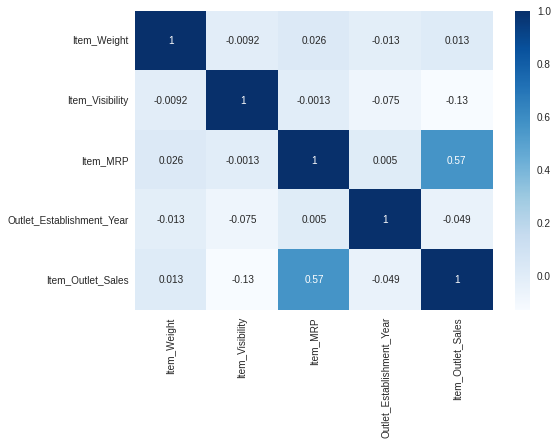

In [232]:
# Creates a heatmap from the correlation
sns.heatmap(corr, cmap = 'Blues', annot = True)

From the heatmap, we can see that the numerical features of the data doesn't exhibit strong correlations, whether negative or positive. The strongest correlation is between the Item_MRP and Item_Outlet_Sales with a value of 0.57 which is only considered moderatley strong (positive). This means that high MRP values is moderately correlated (but not necessarily the cause) to higher Item_Outlet_Sales

### Visibility and Sales for Different Item Types
We can also use heatmaps to visualize data other than the correlation coefficients of the numerical columns. In this part, the average sales for each item type considering their item visibility is extracted and displayed as a heatmap.

In [233]:
# Creates the bin borders for 10 bins from the minimum and maximum values of the visibility values
visibility_bins = np.linspace(min(df_sales.Item_Visibility), max(df_sales.Item_Visibility), 11)

# Calculate the center of each bin as the average of the borders
ave_vis = visibility_bins[:-1] + visibility_bins[1:] / 2

In [234]:
# Obtain a list of the possible item types
types = df_sales.Item_Type.drop_duplicates().tolist()

Text(0.5, 1.0, 'Average Sales and Item Visibility for each Item Type')

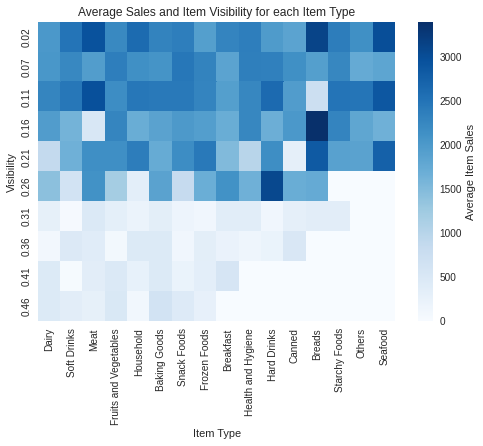

In [235]:
# Initialize a list
sales = list([])

# Get the average sales for each item type grouped by their item visibility
for lower_index in range(len(visibility_bins)-1):
  temp_df = df_sales.loc[(df_sales.Item_Visibility >= visibility_bins[lower_index]) &
                         (df_sales.Item_Visibility < visibility_bins[lower_index+1])]
  vis_sales = temp_df.groupby('Item_Type').mean('Item_Outlet_Sales').Item_Outlet_Sales.tolist()           
  sales.append(vis_sales) # Store the data in the list              

# Converts the list to a dataframe
sales = pd.DataFrame(sales)

# Fills missing values with 0
sales.fillna(0, inplace = True)

# Sets the column and row labels
sales.columns = types # Columns
sales.set_axis(np.round(ave_vis, 2), inplace = True) # Rows

# Create a heatmap
sns.heatmap(sales, cmap = 'Blues', cbar_kws={'label': 'Average Item Sales'})

plt.xlabel('Item Type')
plt.ylabel('Visibility')
plt.title('Average Sales and Item Visibility for each Item Type')

From this heatmap, we can't see much pattern or correlations but it has 1 obvious feature. This shows us that for all item types, after a certain value of visibility, which is 0.31, the average item sales significantly drops. This can mean that for certain items, increasing its visibility further doesn't help in increasing its sales. This information can be used to maybe divert resources that is meant to be used in improving the item's visibility and instead use it in other things.